In [1]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import seaborn as sns
import duckdb
import matplotlib.pyplot as plt
import numpy as np

import folium
from folium.plugins import HeatMap
from IPython.display import IFrame

**Does Police Presence Reduce Drug Related Crime in an Area or just Move It? ~ Crime Displacement Theory vs Diffusion of Benefits**

**Background**

crime displacement theory is when criminal activity is transferred from one location, time tactic, or type to another as a result of crime prevention strategies

diffusion of benefits is when unexpected criminal activity that were not directly targeted by a crime prevention strategy is reduced

These are opposite theories - we want to see which one prevails in new york


**Why Does it Matter?**

data anlysis in this topic can help police change their prevention strategies. By predicitng where crime will displace (if it does), police can be better prepared to deal with an increase in activity in a certain area

**Visualization**

Heat maps to visualize before, during, and after of crime hotspots shifting

Select specific places where police presence changed greatly due to some initiative

Bar chart - different types of drugs

Line graph - show crime changes over time

In [3]:
data = pd.read_csv('drugArrests.csv')
population_data = pd.read_csv('population.csv')

data = duckdb.sql("""SELECT data.county, data.year, data.drugFelony, data.drugMisdemeanor, population_data.population FROM data
                    LEFT JOIN population_data ON data.county = population_data.county AND data.year = population_data.year""").df()

data["felonyPerCapita"] = data["drugFelony"] / data["population"] * 100000
data["misdemeanorPerCapita"] = data["drugMisdemeanor"] / data["population"] * 100000

print(data.head())

   county  year  drugFelony  drugMisdemeanor  population  felonyPerCapita  \
0  Albany  1970          90              179      287114        31.346434   
1  Albany  1971         119              179      288615        41.231398   
2  Albany  1974         225              354      289148        77.814821   
3  Albany  1975         179              327      287864        62.182142   
4  Albany  1976         165              295      286519        57.587804   

   misdemeanorPerCapita  
0             62.344574  
1             62.020339  
2            122.428652  
3            113.595309  
4            102.960013  


trends in and around erie county, an "impact zone" where Operation Impact was implemented from 2004-2010 

<function matplotlib.pyplot.show(close=None, block=None)>

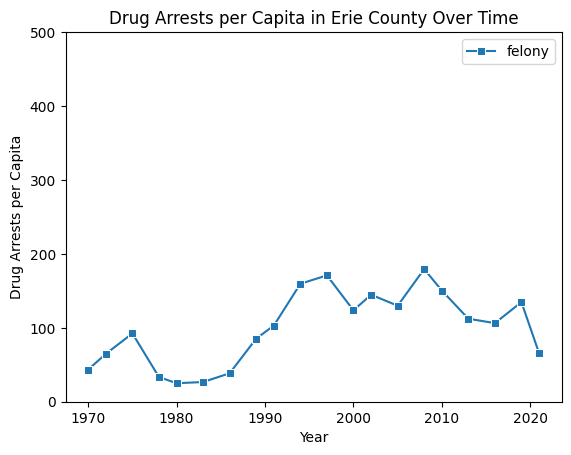

In [4]:
erie = data[data["county"] == "Erie"].sort_values("year").copy()
erie = erie.iloc[::3]

# sns.lineplot(erie, x='year',y='misdemeanorPerCapita', marker='o', label='misdemeanor')
sns.lineplot(erie, x='year', y='felonyPerCapita', marker='s', label='felony')
plt.ylim(0, 500)
plt.xlabel('Year')
plt.ylabel('Drug Arrests per Capita')
plt.title('Drug Arrests per Capita in Erie County Over Time')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

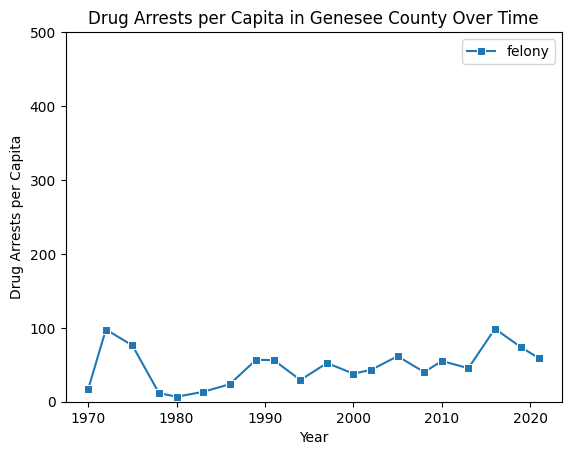

In [5]:
genesee = data[data["county"] == "Genesee"].sort_values("year").copy()
genesee = genesee.iloc[::3]

# sns.lineplot(genesee, x='year',y='misdemeanorPerCapita', marker='o', label='misdemeanor')
sns.lineplot(genesee, x='year', y='felonyPerCapita', marker='s', label='felony')
plt.ylim(0, 500)
plt.xlabel('Year')
plt.ylabel('Drug Arrests per Capita')
plt.title('Drug Arrests per Capita in Genesee County Over Time')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

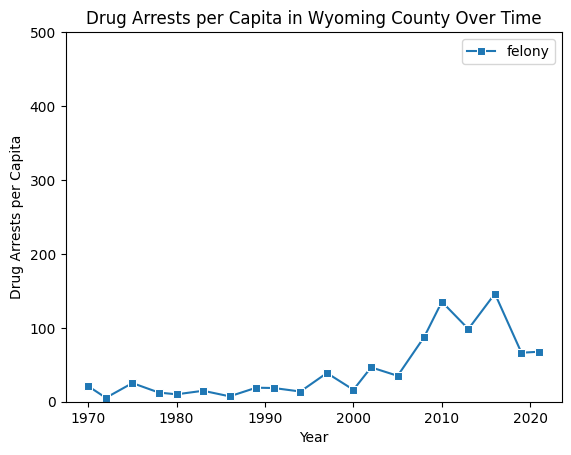

In [6]:
wyoming = data[data["county"] == "Wyoming"].sort_values("year").copy()
wyoming = wyoming.iloc[::3]

# sns.lineplot(wyoming, x='year',y='misdemeanorPerCapita', marker='o', label='misdemeanor')
sns.lineplot(wyoming, x='year', y='felonyPerCapita', marker='s', label='felony')
plt.ylim(0, 500)
plt.xlabel('Year')
plt.ylabel('Drug Arrests per Capita')
plt.title('Drug Arrests per Capita in Wyoming County Over Time')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

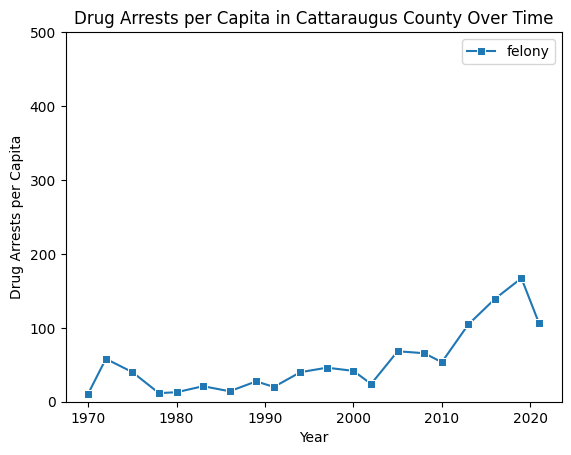

In [7]:
cattaraugus = data[data["county"] == "Cattaraugus"].sort_values("year").copy()
cattaraugus = cattaraugus.iloc[::3]

# sns.lineplot(cattaraugus, x='year',y='misdemeanorPerCapita', marker='o', label='misdemeanor')
sns.lineplot(cattaraugus, x='year', y='felonyPerCapita', marker='s', label='felony')
plt.ylim(0, 500)
plt.xlabel('Year')
plt.ylabel('Drug Arrests per Capita')
plt.title('Drug Arrests per Capita in Cattaraugus County Over Time')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

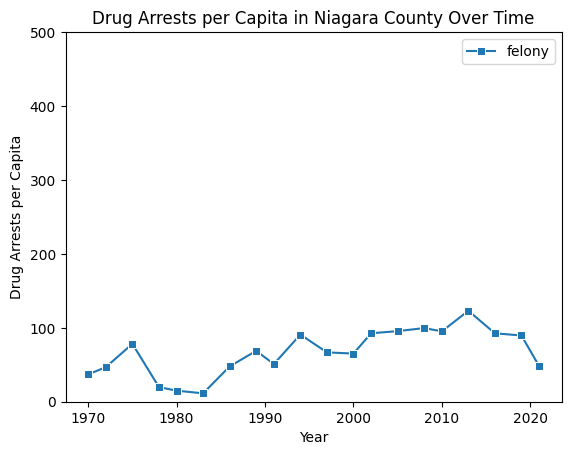

In [8]:
niagara = data[data["county"] == "Niagara"].sort_values("year").copy()
niagara = niagara.iloc[::3]

# sns.lineplot(niagara, x='year',y='misdemeanorPerCapita', marker='o', label='misdemeanor')
sns.lineplot(niagara, x='year', y='felonyPerCapita', marker='s', label='felony')
plt.ylim(0, 500)
plt.xlabel('Year')
plt.ylabel('Drug Arrests per Capita')
plt.title('Drug Arrests per Capita in Niagara County Over Time')
plt.show

trends in and around Onondaga county, an "impact zone" where Operation Impact was implemented from 2004-2010

<function matplotlib.pyplot.show(close=None, block=None)>

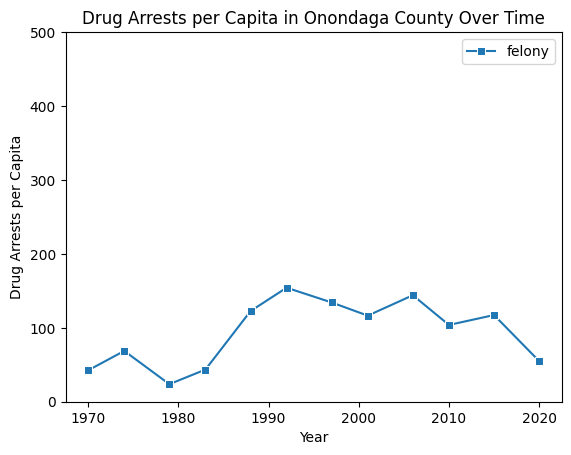

In [9]:
onondaga = data[data["county"] == "Onondaga"].sort_values("year").copy()
onondaga = onondaga.iloc[::5]

# sns.lineplot(onondaga, x='year',y='misdemeanorPerCapita', marker='o', label='misdemeanor')
sns.lineplot(onondaga, x='year', y='felonyPerCapita', marker='s', label='felony')
plt.ylim(0, 500)
plt.xlabel('Year')
plt.ylabel('Drug Arrests per Capita')
plt.title('Drug Arrests per Capita in Onondaga County Over Time')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

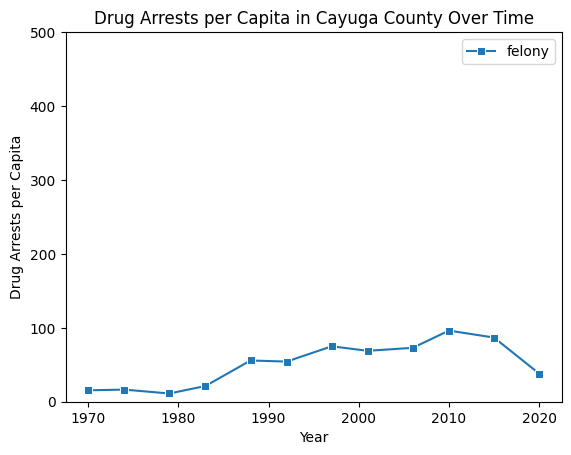

In [10]:
cayuga = data[data["county"] == "Cayuga"].sort_values("year").copy()
cayuga = cayuga.iloc[::5]

# sns.lineplot(cayuga, x='year',y='misdemeanorPerCapita', marker='o', label='misdemeanor')
sns.lineplot(cayuga, x='year', y='felonyPerCapita', marker='s', label='felony')
plt.ylim(0, 500)
plt.xlabel('Year')
plt.ylabel('Drug Arrests per Capita')
plt.title('Drug Arrests per Capita in Cayuga County Over Time')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

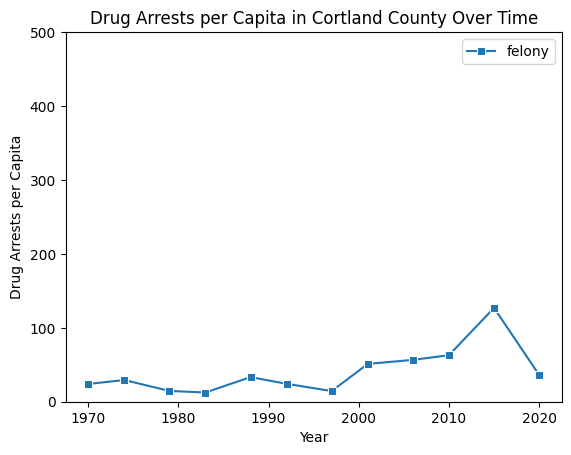

In [11]:
cortland = data[data["county"] == "Cortland"].sort_values("year").copy()
cortland = cortland.iloc[::5]

# sns.lineplot(cortland, x='year',y='misdemeanorPerCapita', marker='o', label='misdemeanor')
sns.lineplot(cortland, x='year', y='felonyPerCapita', marker='s', label='felony')
plt.ylim(0, 500)
plt.xlabel('Year')
plt.ylabel('Drug Arrests per Capita')
plt.title('Drug Arrests per Capita in Cortland County Over Time')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

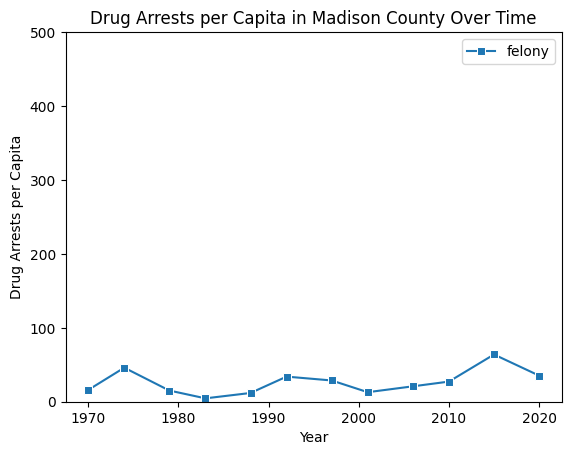

In [12]:
madison = data[data["county"] == "Madison"].sort_values("year").copy()
madison = madison.iloc[::5]

# sns.lineplot(madison, x='year',y='misdemeanorPerCapita', marker='o', label='misdemeanor')
sns.lineplot(madison, x='year', y='felonyPerCapita', marker='s', label='felony')
plt.ylim(0, 500)
plt.xlabel('Year')
plt.ylabel('Drug Arrests per Capita')
plt.title('Drug Arrests per Capita in Madison County Over Time')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

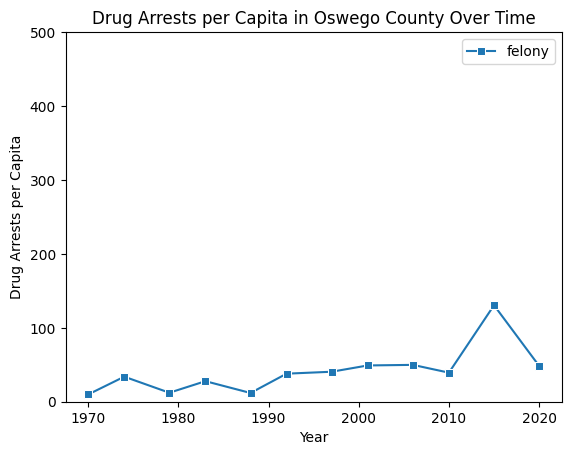

In [13]:
oswego = data[data["county"] == "Oswego"].sort_values("year").copy()
oswego = oswego.iloc[::5]

# sns.lineplot(oswego, x='year',y='misdemeanorPerCapita', marker='o', label='misdemeanor')
sns.lineplot(oswego, x='year', y='felonyPerCapita', marker='s', label='felony')
plt.ylim(0, 500)
plt.xlabel('Year')
plt.ylabel('Drug Arrests per Capita')
plt.title('Drug Arrests per Capita in Oswego County Over Time')
plt.show

In [14]:
ny_data = duckdb.sql("""
    SELECT county, SUM(felonyPerCapita) / COUNT(DISTINCT year) AS avg_felonies, SUM(misdemeanorPerCapita) / COUNT(DISTINCT year) AS avg_misdemeanors
    FROM data 
    GROUP BY county ORDER BY county
""").df()

county_coords = {
    'Albany': [42.6518, -73.7545],
    'Allegany': [42.0901, -78.4942],
    'Bronx': [40.8448, -73.8648],
    'Broome': [42.1792, -75.8534],
    'Cattaraugus': [42.3292, -78.8681],
    'Cayuga': [42.9190, -76.7263],
    'Chautauqua': [42.2098, -79.4668],
    'Chemung': [42.0084, -76.6238],
    'Chenango': [42.2015, -75.8766],
    'Clinton': [43.0484, -75.3785],
    'Columbia': [42.3679, -73.5594],
    'Cortland': [42.6012, -76.1805],
    'Delaware': [42.2452, -74.8741],
    'Dutchess': [41.7784, -73.7478],
    'Erie': [42.6975, -78.7476],
    'Essex': [44.0107, -73.9508],
    'Franklin': [44.5926, -74.3388],
    'Fulton': [43.1119, -74.4995],
    'Genesee': [42.9838, -78.1564],
    'Greene': [42.2957, -74.1240],
    'Hamilton': [43.4764, -74.4057],
    'Herkimer': [43.1631, -74.8741],
    'Jefferson': [44.0607, -75.9928],
    'Kings': [40.6782, -73.9442],
    'Lewis': [43.8401, -75.4345],
    'Livingston': [42.7577, -77.8367],
    'Madison': [42.9806, -75.8069],
    'Monroe': [43.2841, -77.7452],
    'Montgomery': [42.9155, -74.4526],
    'Nassau': [40.6546, -73.5594],
    'New York': [40.7685, -73.9822],
    'Niagara': [43.3119, -78.7476],
    'Oneida': [43.2372, -75.4345],
    'Onondaga': [43.0268, -76.1784],
    'Ontario': [42.8510, -77.2865],
    'Orange': [41.3912, -74.3118],
    'Orleans': [43.4089, -78.2020],
    'Oswego': [43.4825, -76.1784],
    'Otsego': [42.5780, -75.0611],
    'Putnam': [41.4351, -73.7949],
    'Queens': [40.7282, -73.7949],
    'Rensselaer': [42.6737, -73.5594],
    'Richmond': [40.5795, -74.1502],
    'Rockland': [41.1489, -73.9830],
    'Saratoga': [43.0324, -73.9360],
    'Schenectady': [42.8493, -73.9830],
    'Schoharie': [42.6550, -74.4995],
    'Schuyler': [42.3796, -76.8721],
    'Seneca': [42.7652, -76.8721],
    'St. Lawrence': [44.4473, -74.9302],
    'Steuben': [42.3210, -77.3784],
    'Suffolk': [40.9849, -72.6151],
    'Sullivan': [41.6897, -74.7805],
    'Tioga': [42.1256, -76.3637],
    'Tompkins': [42.4576, -76.4968],
    'Ulster': [41.8586, -74.3118],
    'Warren': [43.6079, -73.7478],
    'Washington': [43.2519, -73.3709],
    'Wayne': [43.2020, -77.0104],
    'Westchester': [41.1220, -73.7949],
    'Wyoming': [42.6421, -78.2020],
    'Yates': [42.6431, -77.1485]
}

ny_data['coords'] = ny_data['county'].map(county_coords)

ny_map = folium.Map(location=[42.8, -75.5], zoom_start=7)
heat_data = [[row['coords'][0], row['coords'][1], row['avg_felonies'] + row['avg_misdemeanors']] for _, row in ny_data.iterrows()]
HeatMap(heat_data, radius=30).add_to(ny_map)
ny_map.save("ny_drug_arrests_heatmap.html")


heatmap of all of new york state and how much drug arrests per capita on average are in different regions of the state. (to view, click on the ny_drug_arrests_headmap.html file in your finder or right click open with)

/var/folders/4d/xn0x6qg53vs92srf2ms7g0z40000gn/T/ipykernel_25009/453785126.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  gr.set_xticklabels(gr.get_xticklabels(),rotation="vertical");


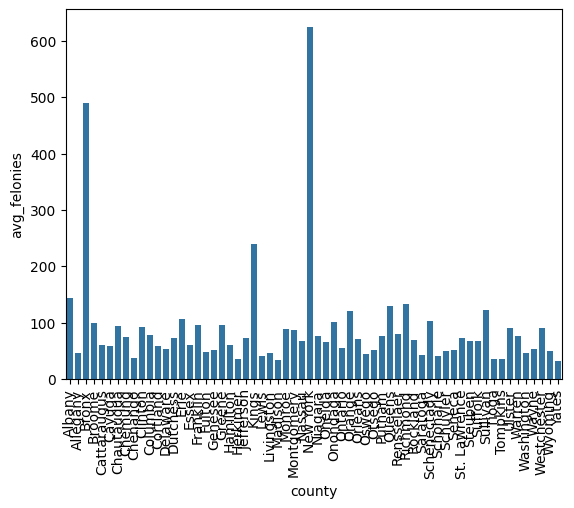

In [15]:
gr = sns.barplot(ny_data, x='county', y='avg_felonies')
gr.set_xticklabels(gr.get_xticklabels(),rotation="vertical");

/var/folders/4d/xn0x6qg53vs92srf2ms7g0z40000gn/T/ipykernel_25009/2028216977.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(),rotation="vertical");


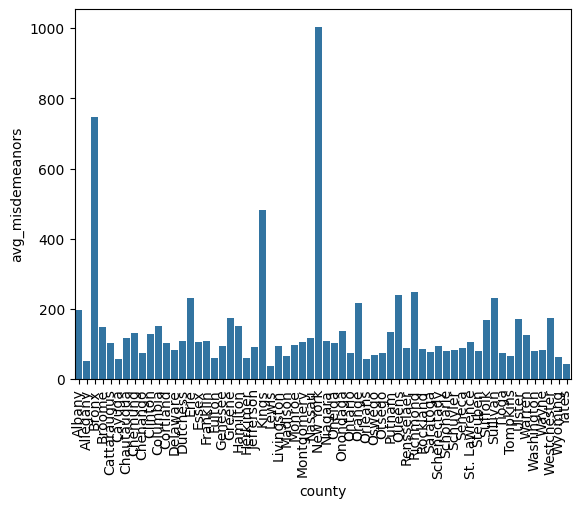

In [16]:
g = sns.barplot(ny_data, x='county', y='avg_misdemeanors')
g.set_xticklabels(g.get_xticklabels(),rotation="vertical");